### Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np

### Загружаем данные

In [3]:
df = pd.read_csv('ab_test_results_aggregated_views_clicks_2.csv')

### Сформулируем гипотезу

Гипотеза: на новой версии CTR выше, значит реклама работает эффективнее.

In [4]:
df

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0
3,4,control,2.0,0.0
4,5,control,3.0,0.0
...,...,...,...,...
119995,119996,test,9.0,0.0
119996,119997,test,2.0,1.0
119997,119998,test,20.0,1.0
119998,119999,test,6.0,1.0


Как мы видим набор данных состоит из 4 полей:


*   user_id - уникальный идентификатор каждого пользователя
*   group - версия старинцы. Исходная версия (control) и новая версия (test)
*   views - количество просмотров страницы
*   clicks - количество кликов





Проверим описательную статистику и уникальные значения

In [5]:
df.nunique()

user_id    120000
group           2
views         111
clicks         10
dtype: int64

In [6]:
df.describe()

,user_id,views,clicks
count,120000.000000,120000.000000,120000.000000
mean,60000.500000,4.991075,0.182692
std,34641.160489,5.915200,0.472547
min,1.000000,1.000000,0.000000
25%,30000.750000,2.000000,0.000000
50%,60000.500000,3.000000,0.000000
75%,90000.250000,6.000000,0.000000
max,120000.000000,205.000000,9.000000


# Рассчитаем CTR

CTR — показатель кликабельности. Чтобы рассчитать показатель, нужно знать количество показов и кликов

CTR = количество кликов / количество показов × 100%

In [7]:
df['ctr'] = round(df['clicks'] / df['views'], 3)
df

,user_id,group,views,clicks,ctr
0,1,control,10.0,0.0,0.000
1,2,control,1.0,0.0,0.000
2,3,control,1.0,0.0,0.000
3,4,control,2.0,0.0,0.000
4,5,control,3.0,0.0,0.000
...,...,...,...,...,...
119995,119996,test,9.0,0.0,0.000
119996,119997,test,2.0,1.0,0.500
119997,119998,test,20.0,1.0,0.050
119998,119999,test,6.0,1.0,0.167


### Разделим CTR между двумя версиями страницы, т.е. исходной версией (control) и новой версией (test).

In [18]:
test = df[df['group'] == 'test']
test

,user_id,group,views,clicks,ctr
60000,60001,test,2.0,0.0,0.000
60001,60002,test,8.0,0.0,0.000
60002,60003,test,12.0,0.0,0.000
60003,60004,test,2.0,0.0,0.000
60004,60005,test,7.0,1.0,0.143
...,...,...,...,...,...
119995,119996,test,9.0,0.0,0.000
119996,119997,test,2.0,1.0,0.500
119997,119998,test,20.0,1.0,0.050
119998,119999,test,6.0,1.0,0.167


In [19]:
control = df[df['group'] == 'control']
control

,user_id,group,views,clicks,ctr
0,1,control,10.0,0.0,0.000
1,2,control,1.0,0.0,0.000
2,3,control,1.0,0.0,0.000
3,4,control,2.0,0.0,0.000
4,5,control,3.0,0.0,0.000
...,...,...,...,...,...
59995,59996,control,2.0,1.0,0.500
59996,59997,control,6.0,1.0,0.167
59997,59998,control,1.0,0.0,0.000
59998,59999,control,15.0,1.0,0.067


Обычно рекомендуется разделить вариантную и контрольную группы поровну при A/B тестировании, чтобы гарантировать, что любые различия в результатах теста не вызваны неравномерным распределением участников между группами.

В нашем случае группы разделены поровну.

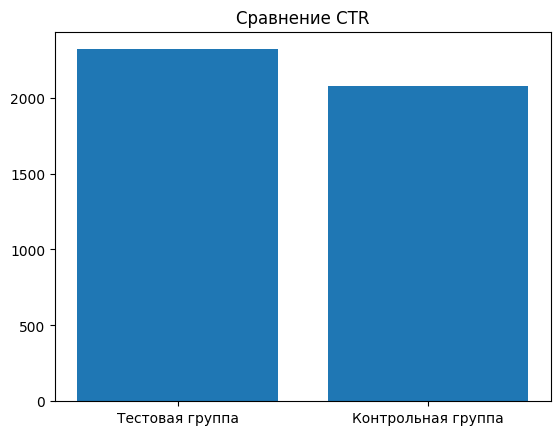

In [27]:
import matplotlib.pyplot as plt


val = [test['ctr'].sum(), control['ctr'].sum()]
label = ['Тестовая группа', 'Контрольная группа']
plt.bar(label, val)
plt.title('Сравнение CTR')
plt.show()

Из графика можно сделать вывод, что тестовая группа имеет более высокий CTR

### Проанализируем данные

### Z тест

* H0: нет существенной разницы между контрольной и тестовой группой (CTR равны)

* H1: существенная разница между контрольной и тестовой группой есть (CTR не равны)

* alpha = 0.05


In [12]:
import scipy.stats as stats
sample_size = 60000
alpha = 0.05


z_score = (test.mean()-control.mean())/(control.std()/np.sqrt(sample_size))
print('Z значение :',z_score)


z_critical = stats.norm.ppf(1-alpha)
print('Z критическое :',z_critical)


if z_score >  z_critical:
    print("Нулевая гипотеза отклоняется")
else:
    print("Нулевая гипотеза принимается")

Z значение : 8.53332483047081
Z критическое : 1.6448536269514722
Нулевая гипотеза отклоняется


Можно сделать вывод, что есть статистически значимая разница между контрольной и вариационной группами.


### Тест Манна-Уитни

* H0: нет существенной разницы между контрольной и тестовой группой (CTR равны)

* H1: существенная разница между контрольной и тестовой группой есть (CTR не равны)

* alpha = 0.05

In [28]:
stats.mannwhitneyu (test['ctr'], control['ctr'], alternative='two-sided')

MannwhitneyuResult(statistic=1826996554.5, pvalue=8.259463834737971e-13)

pvalue < 0.05, значит мы отвергаем нулевую гипотезу в пользу альтернативной. Статистически значимая разница между группами есть

### Результат

Исходя из проведенных, можно сделать вывод, что новая версия рекламы действительно эффективнее, так как CTR выше. Использование изменений в тестовой группе имеет большую кликабельность и вовлеченность пользователей, что может привести к большему количеству продаж при меньших затратах на рекламу. В данном случае, ваша первоначальная гипотеза оказывается подтверждена на основе проведенного z-теста и теста Манна-Уитни.